In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=9062ac056ff452a6ccf1bdb37f5c3a3fffd53911916ac5751b38e5faae2cc16f
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [3]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from apyori import apriori
from mlxtend.preprocessing import TransactionEncoder
from itertools import combinations

#Q1

Perform exploratory data analysis (EDA) over the shared dataset.Report at least three insights about the dataset.

In [95]:
#Amulya
path = "/content/drive/MyDrive/DMG_Assignment/Assignment_2/Dataset/"
# Aniket
# path = '/content/drive/MyDrive/Projects/DMG_Assignment/Assignment_2/Dataset/'
links = pd.read_csv(path + "links.csv")
movies = pd.read_csv(path + "movies.csv")
ratings = pd.read_csv(path + "ratings.csv")
tags = pd.read_csv(path + "tags.csv")


1. Finding Number of rows and columns in each file

In [7]:
print("Shape of links : ", links.shape)
print("Shape of movies : ", movies.shape)
print("Shape of ratings : ", ratings.shape)
print("Shape of tags : ", tags.shape)

Shape of links :  (9742, 3)
Shape of movies :  (9742, 3)
Shape of ratings :  (100836, 4)
Shape of tags :  (3683, 4)


2. Find Columns of each file

In [ ]:
print("Columns of Movies : ", movies.columns)
print("Columns of Ratings : ", ratings.columns)
print("Columns of Links : ", links.columns)
print("Columns of Tags : ", tags.columns)

Columns of Movies :  Index(['movieId', 'title', 'genres'], dtype='object')
Columns of Ratings :  Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Columns of Links :  Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')
Columns of Tags :  Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')


3. Finding DataTypes of columns

In [ ]:
print("DataTypes of movies: ")
print(movies.dtypes)
print()
print("DataTypes of ratings: ")
print(ratings.dtypes)
print()
print("DataTypes of links: ")
print(links.dtypes)
print()
print("DataTypes of tags: ")
print(tags.dtypes)
print()

DataTypes of movies: 
movieId     int64
title      object
genres     object
dtype: object

DataTypes of ratings: 
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

DataTypes of links: 
movieId      int64
imdbId       int64
tmdbId     float64
dtype: object

DataTypes of tags: 
userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object



4. finding frequently occurring values in categorical features


In [ ]:
print("Frequently occurring values in title column in movies")
print(movies['title'].mode())
print()
print("Frequently occurring values in genres column in movies")
print(movies['genres'].mode())
print()
print("Frequently occurring values in rating column in ratings")
print(ratings['rating'].mode())
print()
print("Frequently occurring values in tag column in tags")
print(tags['tag'].mode())

Frequently occurring values in title column in movies
0    Confessions of a Dangerous Mind (2002)
1                               Emma (1996)
2                               Eros (2004)
3                           Saturn 3 (1980)
4                  War of the Worlds (2005)
dtype: object

Frequently occurring values in genres column in movies
0    Drama
dtype: object

Frequently occurring values in rating column in ratings
0    4.0
dtype: float64

Frequently occurring values in tag column in tags
0    In Netflix queue
dtype: object


5. Counting of Nan values per column

In [ ]:
print("Number of NaN Values per column in Movies:")
print(movies.isnull().sum())
print("Number of NaN Values per column in Links:")
print(links.isnull().sum())
print("Number of NaN Values per column in Tags:")
print(tags.isnull().sum())
print("Number of NaN Values per column in Ratings:")
print(ratings.isnull().sum())

Number of NaN Values per column in Movies:
movieId    0
title      0
genres     0
dtype: int64
Number of NaN Values per column in Links:
movieId    0
imdbId     0
tmdbId     8
dtype: int64
Number of NaN Values per column in Tags:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64
Number of NaN Values per column in Ratings:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


6. Merging all files in one

In [9]:
df1 = pd.merge(links, movies, on="movieId")
df2 = pd.merge(df1, ratings, on="movieId")
df3 = pd.merge(df2, tags, on="movieId")
print("Shape of data : ", df3.shape)
col = df3.columns
print(col)

Shape of data :  (233213, 11)
Index(['movieId', 'imdbId', 'tmdbId', 'title', 'genres', 'userId_x', 'rating',
       'timestamp_x', 'userId_y', 'tag', 'timestamp_y'],
      dtype='object')


In [ ]:
df3.head()

,movieId,imdbId,tmdbId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825


7. Heatmap

In [ ]:
import copy
heat_df3 = copy.deepcopy(df3)
heat_df3['title'] = df3['title'].astype('category')
heat_df3['genres'] = df3['genres'].astype('category')
heat_df3['tag'] = df3['tag'].astype('category')

cat_columns = heat_df3.select_dtypes(['category']).columns
cat_columns
heat_df3[cat_columns] = heat_df3[cat_columns].apply(lambda x: x.cat.codes)

In [ ]:
corr = heat_df3.corr()
corr.style.background_gradient(cmap ='coolwarm')

,movieId,imdbId,tmdbId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
movieId,1.000000,0.893323,0.738552,-0.095154,-0.136441,0.015315,-0.070718,0.375287,-0.223557,-0.002756,0.092860
imdbId,0.893323,1.000000,0.805425,-0.063436,-0.104096,0.011689,-0.051307,0.330970,-0.202470,0.002049,0.115077
tmdbId,0.738552,0.805425,1.000000,-0.015202,-0.035531,0.011060,-0.051000,0.223654,-0.173187,-0.006871,0.090848
title,-0.095154,-0.063436,-0.015202,1.000000,0.068686,-0.015927,0.056392,-0.106343,0.040234,0.016276,0.005542
genres,-0.136441,-0.104096,-0.035531,0.068686,1.000000,0.001274,0.007612,-0.090946,0.187360,0.031330,-0.035602
userId_x,0.015315,0.011689,0.011060,-0.015927,0.001274,1.000000,0.047780,0.058578,-0.015140,-0.006367,-0.026774
rating,-0.070718,-0.051307,-0.051000,0.056392,0.007612,0.047780,1.000000,-0.009884,0.106969,0.031200,0.119404
timestamp_x,0.375287,0.330970,0.223654,-0.106343,-0.090946,0.058578,-0.009884,1.000000,-0.108008,0.015808,0.080550
userId_y,-0.223557,-0.202470,-0.173187,0.040234,0.187360,-0.015140,0.106969,-0.108008,1.000000,0.107625,0.033755
tag,-0.002756,0.002049,-0.006871,0.016276,0.031330,-0.006367,0.031200,0.015808,0.107625,1.000000,0.130745


8. Plotting correlation between features

In [ ]:
xaxis= np.arange(0,len(df3))

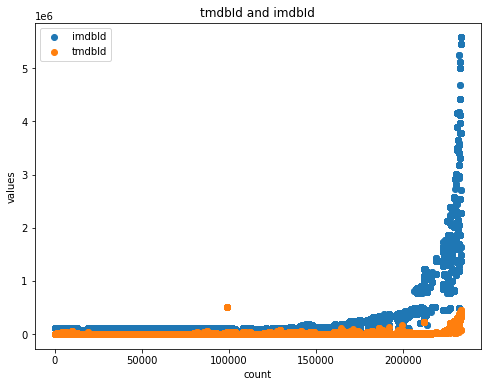

In [ ]:
plt.figure(figsize=(8,6))
plt.title('tmdbId and imdbId')
x = df3['imdbId']
y = df3['tmdbId']
plt.scatter(xaxis, x, label = "imdbId")
plt.scatter(xaxis, y, label = "tmdbId")
plt.legend()
plt.xlabel('count')
plt.ylabel('values')
plt.show()

# Q2

In [4]:
def Processing_Movies(movies):
  mdf = movies.drop('genres',axis = 1)
  mdf = mdf.join(movies.genres.str.get_dummies())
  mdf = mdf.drop([	'movieId'	,'title'],axis = 1)
  mdf.head()
  mdf_n = []
  mdf_a = np.array(mdf)
  mdf_c = list(mdf.columns)
  mdf_len = len(mdf_c)
  for i in range(len(mdf)):
    t = []
    for j in range(mdf_len):
      if mdf_a[i,j]==1:
        t.append(mdf_c[j])
    mdf_n.append(t)
  return mdf_n 

const = 1.7
def Rule_Mining(mdf_n,min_length=2,min_support=0.0005, min_confidence=0.3, min_lift=3):
  arules = apriori(mdf_n, min_length=min_length,min_support=min_support, min_confidence=min_confidence, min_lift=min_lift)
  afinal = list(arules)
  rules = []
  for i in range(len(afinal)):
    x = list(list(list(afinal[i][2])[0])[0])
    y = list(list(list(afinal[i][2])[0])[1])
    rules.append((x,y))
  return rules,afinal 

def getactualids(ratings):
  ratings = ratings.sort_values(by=['userId','movieId'])
  actual_ids = {}
  user_ids = list(set(ratings['userId']))
  for i in range(len(user_ids)):
    actual_ids[user_ids[i]] = list(ratings[ratings['userId']==user_ids[i]]['movieId'])
  return actual_ids,user_ids

def getmoviegenre(movies):
  mdf = movies.drop('genres',axis = 1)
  mdf = mdf.join(movies.genres.str.get_dummies())
  col = list(mdf.columns)
  col = col[2:]
  Genre_Movie_ID = {}
  for i in range(len(col)):
    colv = list(mdf[mdf[col[i]]==1]['movieId'])
    Genre_Movie_ID[col[i]] = colv  
  return Genre_Movie_ID  

def getusergenre(df3,user_ids):
  User_Genre = df3[['genres','userId_x']]
  User_Genre_dict = {}
  for i in range(len(user_ids)):
    User_Genre_dict[user_ids[i]] = list(User_Genre[User_Genre['userId_x']==user_ids[i]]['genres'])

  for i in list(User_Genre_dict.keys()):
    v = User_Genre_dict[i]
    temp = []
    for j in v:
      temp = temp + j.split('|')
    temp = list(set(temp))
    User_Genre_dict[i] = temp

  return User_Genre_dict

def getpredictedids(user_ids,User_Genre_dict,rules):
  predicted_ids = {}
  for i in range(len(user_ids)):
    watched_genre = User_Genre_dict[user_ids[i]]
    pred_movie = []
    for j in range(len(rules)):
      rule = rules[j]
      l1 = rule[0]
      l2 = rule[1][0]
      contained =  all(k in watched_genre for k in l1)
      if contained:
        predgenre = l2
        pred_movie = pred_movie + Genre_Movie_ID[predgenre]
    predicted_ids[user_ids[i]] = pred_movie   

  return  predicted_ids  
  
def Pecision_k(actual_ids,predicted_ids,k,):
  pre = 0
  for i in actual_ids:
    ints = len(set.intersection(set(actual_ids[i]),set(predicted_ids[i])))
    div = (len(set(actual_ids[i]))*((k/10)*const))
    pre = pre + ints/div

  pre = pre/len(list(actual_ids.keys()))
  return pre  


In [10]:
mdf_n = Processing_Movies(movies)
rules,afinal = Rule_Mining(mdf_n,min_support=.005,min_confidence=0.5)
actual_ids,user_ids = getactualids(ratings)
Genre_Movie_ID = getmoviegenre(movies)
User_Genre_dict= getusergenre(df3,user_ids)
predicted_ids = getpredictedids(user_ids,User_Genre_dict,rules)
print('Precision Score : ',Pecision_k(actual_ids,predicted_ids,4))

Precision Score :  0.920286983160308


In [ ]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
movies_input = []
input_movies = input('Enter the name for inference (mutliple movies seprated by ,) : ')
while input_movies!= "":
  movies_input.append(input_movies.split(','))
  input_movies = input('Enter the name for inference (mutliple movies seprated by ,) : ')

watched_genres = []
for i in range(len(movies_input)):
  t1 = []
  for j in range(len(movies_input[i])):
    t = list(movies[movies['title']==movies_input[i][j]]['genres'])[0].split('|')
    t1 = t1 + t 
  watched_genres.append(list(set(t1)))  

np.random.seed(42)
predicted_ids = []
for i,watched_genre in enumerate(watched_genres):
  pred_movie = []
  for j in range(len(rules)):
    rule = rules[j]
    l1 = rule[0]
    l2 = rule[1][0]
    contained =  all(k in watched_genre for k in l1)
  for k in watched_genre :
    pred_movie = pred_movie + Genre_Movie_ID[k]
  predicted_ids.append(list(np.random.choice(pred_movie,4)))

movie_names = []
for i in predicted_ids:
  name = []
  for j in i:
    name.append(list(movies[movies['movieId']==j]['title'])[0])
  name = " , ".join(name)  
  movie_names.append(name)


input_movie_names = []
for i in movies_input:
  input_movie_names.append(" , ".join(i))

output = pd.DataFrame()
output['Input'] = input_movie_names
output['Inference'] = movie_names
print(output)
output.to_csv('output.csv')  
#Jumanji (1995), Toy Story (1995), Black Butler: Book of the Atlantic (2017)
# Grumpier Old Men (1995), Waiting to Exhale (1995), Andrew Dice Clay: Dice Rules (1991)

Enter the name for inference (mutliple movies seprated by ,) : Jumanji (1995),Toy Story (1995),Black Butler: Book of the Atlantic (2017)
Enter the name for inference (mutliple movies seprated by ,) : Grumpier Old Men (1995),Waiting to Exhale (1995),Andrew Dice Clay: Dice Rules (1991)
Enter the name for inference (mutliple movies seprated by ,) : 
                                               Input                                          Inference
0  Jumanji (1995) , Toy Story (1995) , Black Butl...  Monday (2000) , Shadow, The (1994) , First Wiv...
1  Grumpier Old Men (1995) , Waiting to Exhale (1...  Blankman (1994) , He Said, She Said (1991) , S...


# Given Test File

In [43]:
# test_file = pd.read_csv("/content/drive/MyDrive/Projects/DMG_Assignment/Assignment_2/Dataset/X_test_multiX4.tsv", sep='\t')
test_file = pd.read_csv("/content/drive/MyDrive/DMG_Assignment/Assignment_2/Dataset/X_test_multiX4.tsv", sep='\t')

test_file

,movies,recommendation
0,Jurassic Park (1993)\nFirst Kid (1996)\n101 Da...,NaN
1,Liar Liar (1997)\nAnastasia (1997)\nMurder at ...,NaN
2,"Clockwork Orange, A (1971)\nPostino, Il (1994)...",NaN
3,Toy Story (1995)\n Pretty Woman (1990),NaN
4,Hoop Dreams (1994)\nOne Flew Over the Cuckoo's...,NaN
...,...,...
745,"Kiss Me, Guido (1997)\nChasing Amy (1997)\nSec...",NaN
746,"Toy Story (1995)\nMaltese Falcon, The (1941)\n...",NaN
747,"Lion King, The (1994)\n Rock, The (1996)\n Net...",NaN
748,Ulee's Gold (1997)\n Michael Collins (1996)\n ...,NaN


In [44]:
movies_input = []
for i in range(len(test_file)):
  line = test_file['movies'].iloc[i]
  movies_input.append(line.strip().split("\n"))

print(movies_input[0])

['Jurassic Park (1993)', 'First Kid (1996)', '101 Dalmatians (1996)', 'Homeward Bound: The Incredible Journey (1993)']


In [14]:
watched_genres = []
for i in range(len(movies_input)):
  t1 = []
  for j in range(len(movies_input[i])):
    if(list(movies[movies['title']==movies_input[i][j]]['genres'])!=[]):
      t = list(movies[movies['title']==movies_input[i][j]]['genres'])[0].split('|')
    else :
      t = ['Action','Comedy']  
    t1 = t1 + t 
  watched_genres.append(list(set(t1)))  

np.random.seed(42)
predicted_ids = []
for i,watched_genre in enumerate(watched_genres):
  pred_movie = []
  for j in range(len(rules)):
    rule = rules[j]
    l1 = rule[0]
    l2 = rule[1][0]
    contained =  all(k in watched_genre for k in l1)
  for k in watched_genre :
    pred_movie = pred_movie + Genre_Movie_ID[k]
  predicted_ids.append(list(np.random.choice(pred_movie,4)))

movie_names = []
for i in predicted_ids:
  name = []
  for j in i:
    name.append(list(movies[movies['movieId']==j]['title'])[0])
  name = " , ".join(name)  
  movie_names.append(name)


input_movie_names = []
for i in movies_input:
  input_movie_names.append(" , ".join(i))

output = pd.DataFrame()
output['Movies'] = input_movie_names
output['recommendation'] = movie_names
output.to_csv("/content/drive/MyDrive/DMG_Assignment/Assignment_2/MT20004_MT200230.tsv",index=False,sep="\t")

In [ ]:
output_file = pd.read_csv("/content/drive/MyDrive/DMG_Assignment/Assignment_2/MT20004_MT200230.tsv", sep='\t')
output_file

,Movies,recommendation
0,"Jurassic Park (1993) , First Kid (1996) , 101 ...","Awful Truth, The (1937) , Missing, The (2003) ..."
1,"Liar Liar (1997) , Anastasia (1997) , Murder a...","Return from Witch Mountain (1978) , Police Aca..."
2,"Clockwork Orange, A (1971) , Postino, Il (1994...","Hercules (2014) , Pacific Heights (1990) , I L..."
3,"Toy Story (1995) , Pretty Woman (1990)","In the Company of Men (1997) , Fuck You, Goeth..."
4,"Hoop Dreams (1994) , One Flew Over the Cuckoo'...","I Never Promised You a Rose Garden (1977) , Ou..."
...,...,...
745,"Kiss Me, Guido (1997) , Chasing Amy (1997) , S...","Gone Fishin' (1997) , The Disaster Artist (201..."
746,"Toy Story (1995) , Maltese Falcon, The (1941) ...","Frontière(s) (2007) , Identity (2003) , B/W (2..."
747,"Lion King, The (1994) , Rock, The (1996) , N...","Wild Card (2015) , Cup, The (Phörpa) (1999) , ..."
748,"Ulee's Gold (1997) , Michael Collins (1996) ,...","Mercury Rising (1998) , Father of the Bride Pa..."


In [ ]:
output_file.isnull().values.any()

False

# Q3

In [ ]:
def getfrequentitems(afinal,rules):
  data = []
  for i in range(len(afinal)):
    x = rules[i][0]
    y = rules[i][1]
    s = afinal[i][1]
    data.append([x+y,s,len(x+y)])
  freq = pd.DataFrame(data,columns = ['Itemsets','Support','Length'])
  return freq

In [ ]:
getfrequentitems(afinal,rules).head(26)

,Itemsets,Support,Length
0,"[IMAX, Action]",0.009546,2
1,"[IMAX, Adventure]",0.008212,2
2,"[Film-Noir, Crime]",0.005338,2
3,"[Mystery, Thriller]",0.036338,2
4,"[Action, Animation, Adventure]",0.007801,3
5,"[Children, Action, Adventure]",0.005543,3
6,"[Fantasy, Action, Adventure]",0.014781,3
7,"[Adventure, Sci-Fi, Action]",0.020530,3
8,"[Adventure, Thriller, Action]",0.016116,3
9,"[IMAX, Action, Sci-Fi]",0.005235,3


#On the basis of ratings

In [96]:
# test_file = pd.read_csv("/content/drive/MyDrive/Projects/DMG_Assignment/Assignment_2/Dataset/X_test_multiX4.tsv", sep='\t')
test_file = pd.read_csv("/content/drive/MyDrive/DMG_Assignment/Assignment_2/Dataset/X_test_multiX4.tsv", sep='\t')
test_file

,movies,recommendation
0,Jurassic Park (1993)\nFirst Kid (1996)\n101 Da...,NaN
1,Liar Liar (1997)\nAnastasia (1997)\nMurder at ...,NaN
2,"Clockwork Orange, A (1971)\nPostino, Il (1994)...",NaN
3,Toy Story (1995)\n Pretty Woman (1990),NaN
4,Hoop Dreams (1994)\nOne Flew Over the Cuckoo's...,NaN
...,...,...
745,"Kiss Me, Guido (1997)\nChasing Amy (1997)\nSec...",NaN
746,"Toy Story (1995)\nMaltese Falcon, The (1941)\n...",NaN
747,"Lion King, The (1994)\n Rock, The (1996)\n Net...",NaN
748,Ulee's Gold (1997)\n Michael Collins (1996)\n ...,NaN


In [97]:
movies_input = []
for i in range(len(test_file)):
  line = test_file['movies'].iloc[i]
  movies_input.append(line.strip().split("\n"))
  
input_movie_names = []
for i in movies_input:
  input_movie_names.append(" , ".join(i))

In [98]:
data = pd.merge(movies, ratings, on='movieId')
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [99]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())

In [100]:
moviemat = data.pivot_table(index ='userId', columns ='title', values ='rating')
ratings.sort_values('num of ratings', ascending = False)

,rating,num of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
...,...,...
King Solomon's Mines (1950),3.000000,1
King Solomon's Mines (1937),2.500000,1
King Ralph (1991),1.500000,1


In [109]:
col = moviemat.columns

In [112]:
movie_name='Postino, Il (1994)'
if movie_name in col:
  print("yes")
else:
  print("no")

no


In [101]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
lis_of_lis =[]
col = moviemat.columns
for i in range(len(movies_input)):
  print(i)
  customer = movies_input[i]
  lis = []
  for j in range(len(customer)):
    movie_name = customer[j]
    if movie_name in col:
      similar_movie = moviemat.corrwith(moviemat[movie_name])
      corr_movie = pd.DataFrame(similar_movie, columns =['Correlation'])
      corr_movie['movie_title'] = corr_movie.index
      corr_movie.dropna(inplace = True)
      corr_movie = corr_movie.sort_values('Correlation', ascending = False)
      corr_movie = corr_movie.join(ratings['num of ratings'])
      corr_movie = corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation', ascending = False)
      for k in range(1,3):
        y = corr_movie['movie_title']
        if k<=len(y):
          lis.append(corr_movie['movie_title'].iloc[k])
      lis = (list(set(lis)))
  lis_of_lis.append(lis)

In [123]:
ratings

,rating,num of ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
...,...,...
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5


In [125]:
ratings.sort_values('rating', ascending = False)

,rating,num of ratings
title,,
Gena the Crocodile (1969),5.0,1
True Stories (1986),5.0,1
Cosmic Scrat-tastrophe (2015),5.0,1
Love and Pigeons (1985),5.0,1
Red Sorghum (Hong gao liang) (1987),5.0,1
...,...,...
Don't Look Now (1973),0.5,1
Journey 2: The Mysterious Island (2012),0.5,1
Joe Dirt 2: Beautiful Loser (2015),0.5,1


In [128]:
ratings['title'] = ratings.index

In [129]:
temp = []
for k in range(8):
   temp.append(ratings['title'].iloc[k])

In [130]:
temp

["'71 (2014)",
 "'Hellboy': The Seeds of Creation (2004)",
 "'Round Midnight (1986)",
 "'Salem's Lot (2004)",
 "'Til There Was You (1997)",
 "'Tis the Season for Love (2015)",
 "'burbs, The (1989)",
 "'night Mother (1986)"]

In [131]:
for i in range(len(lis_of_lis)):
  if lis_of_lis[i] == []:
    lis_of_lis[i] = temp

In [133]:
output = pd.DataFrame()
output['Movies'] = input_movie_names
output['recommendation'] = lis_of_lis
output.to_csv("/content/drive/MyDrive/DMG_Assignment/Assignment_2/MT20004_MT200230.tsv",index=False,sep="\t")

In [135]:
output_file = pd.read_csv("/content/drive/MyDrive/DMG_Assignment/Assignment_2/MT20004_MT200230.tsv", sep='\t')
output_file

,Movies,recommendation
0,"Jurassic Park (1993) , First Kid (1996) , 101 ...","['Taxi Driver (1976)', 'Apollo 13 (1995)', 'Be..."
1,"Liar Liar (1997) , Anastasia (1997) , Murder a...","['American Pie (1999)', 'Crimson Tide (1995)',..."
2,"Clockwork Orange, A (1971) , Postino, Il (1994...","['Crimson Tide (1995)', ""One Flew Over the Cuc..."
3,"Toy Story (1995) , Pretty Woman (1990)","['Incredibles, The (2004)', 'Finding Nemo (200..."
4,"Hoop Dreams (1994) , One Flew Over the Cuckoo'...","['Clockwork Orange, A (1971)', 'Trainspotting ..."
...,...,...
745,"Kiss Me, Guido (1997) , Chasing Amy (1997) , S...","['Crimson Tide (1995)', 'Cliffhanger (1993)', ..."
746,"Toy Story (1995) , Maltese Falcon, The (1941) ...",['Pirates of the Caribbean: The Curse of the B...
747,"Lion King, The (1994) , Rock, The (1996) , N...","['Aladdin (1992)', 'Beautiful Mind, A (2001)']"
748,"Ulee's Gold (1997) , Michael Collins (1996) ,...","['Godfather, The (1972)', 'Sixth Sense, The (1..."
